<a href="https://colab.research.google.com/github/sanchesprogramer/Ciencia-de-dados/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Raphael Dias Sanches RA: 10403418
#Felipe de Almeida Parreira RA: 10400771
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import graphviz
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [92]:
dataset = pd.read_csv('https://raw.githubusercontent.com/sanchesprogramer/Ciencia-de-dados/main/trab10.csv', encoding='UTF-8', sep=';')

In [93]:
dataset.head()

,Curva,Tipo_De_Material,Setor_Industrial,Unidade_Volume,Custo (R$),Volume (m³)
0,A,MATERIAL_ALTO_VALOR,INDÚSTRIA_FARMACÊUTICA,TONELADA,"1500,00",3.50000
1,A,MATERIAL_ALTO_VALOR,QUÍMICA,GRAMA,"4500,00",0.00008
2,A,PRODUTO_ACABADO,COMÉRCIO,KG,"30,00",0.00120
3,A,PRODUTO_ACABADO,ENGENHARIA_MECÂNICA,TONELADA,"1600,00",3.90000
4,A,PRODUTO_ACABADO,INDÚSTRIA_FARMACÊUTICA,LIBRA,"200,00",0.00200


In [94]:
dataset.shape

(141, 6)

In [95]:
X = dataset.iloc[:,[0,1,2,3]]
print(X)

    Curva     Tipo_De_Material        Setor_Industrial Unidade_Volume
0       A  MATERIAL_ALTO_VALOR  INDÚSTRIA_FARMACÊUTICA       TONELADA
1       A  MATERIAL_ALTO_VALOR                 QUÍMICA          GRAMA
2       A      PRODUTO_ACABADO                COMÉRCIO             KG
3       A      PRODUTO_ACABADO     ENGENHARIA_MECÂNICA       TONELADA
4       A      PRODUTO_ACABADO  INDÚSTRIA_FARMACÊUTICA          LIBRA
..    ...                  ...                     ...            ...
136     C  PRODUTO_SEMIACABADO     ENGENHARIA_MECÂNICA        UNIDADE
137     C  PRODUTO_SEMIACABADO     ENGENHARIA_MECÂNICA        UNIDADE
138     C  PRODUTO_SEMIACABADO                 QUÍMICA        UNIDADE
139     C  PRODUTO_SEMIACABADO                 QUÍMICA        UNIDADE
140     C  PRODUTO_SEMIACABADO                 QUÍMICA        UNIDADE

[141 rows x 4 columns]


In [96]:
y = dataset.iloc[:,[0]]
print(y)

    Curva
0       A
1       A
2       A
3       A
4       A
..    ...
136     C
137     C
138     C
139     C
140     C

[141 rows x 1 columns]


In [97]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [98]:
one_hot_data = pd.get_dummies(X[['Tipo_De_Material','Setor_Industrial']], drop_first=True)

In [99]:
clf = clf.fit(one_hot_data, y)

Acurácia da árvore de decisão: 0.62


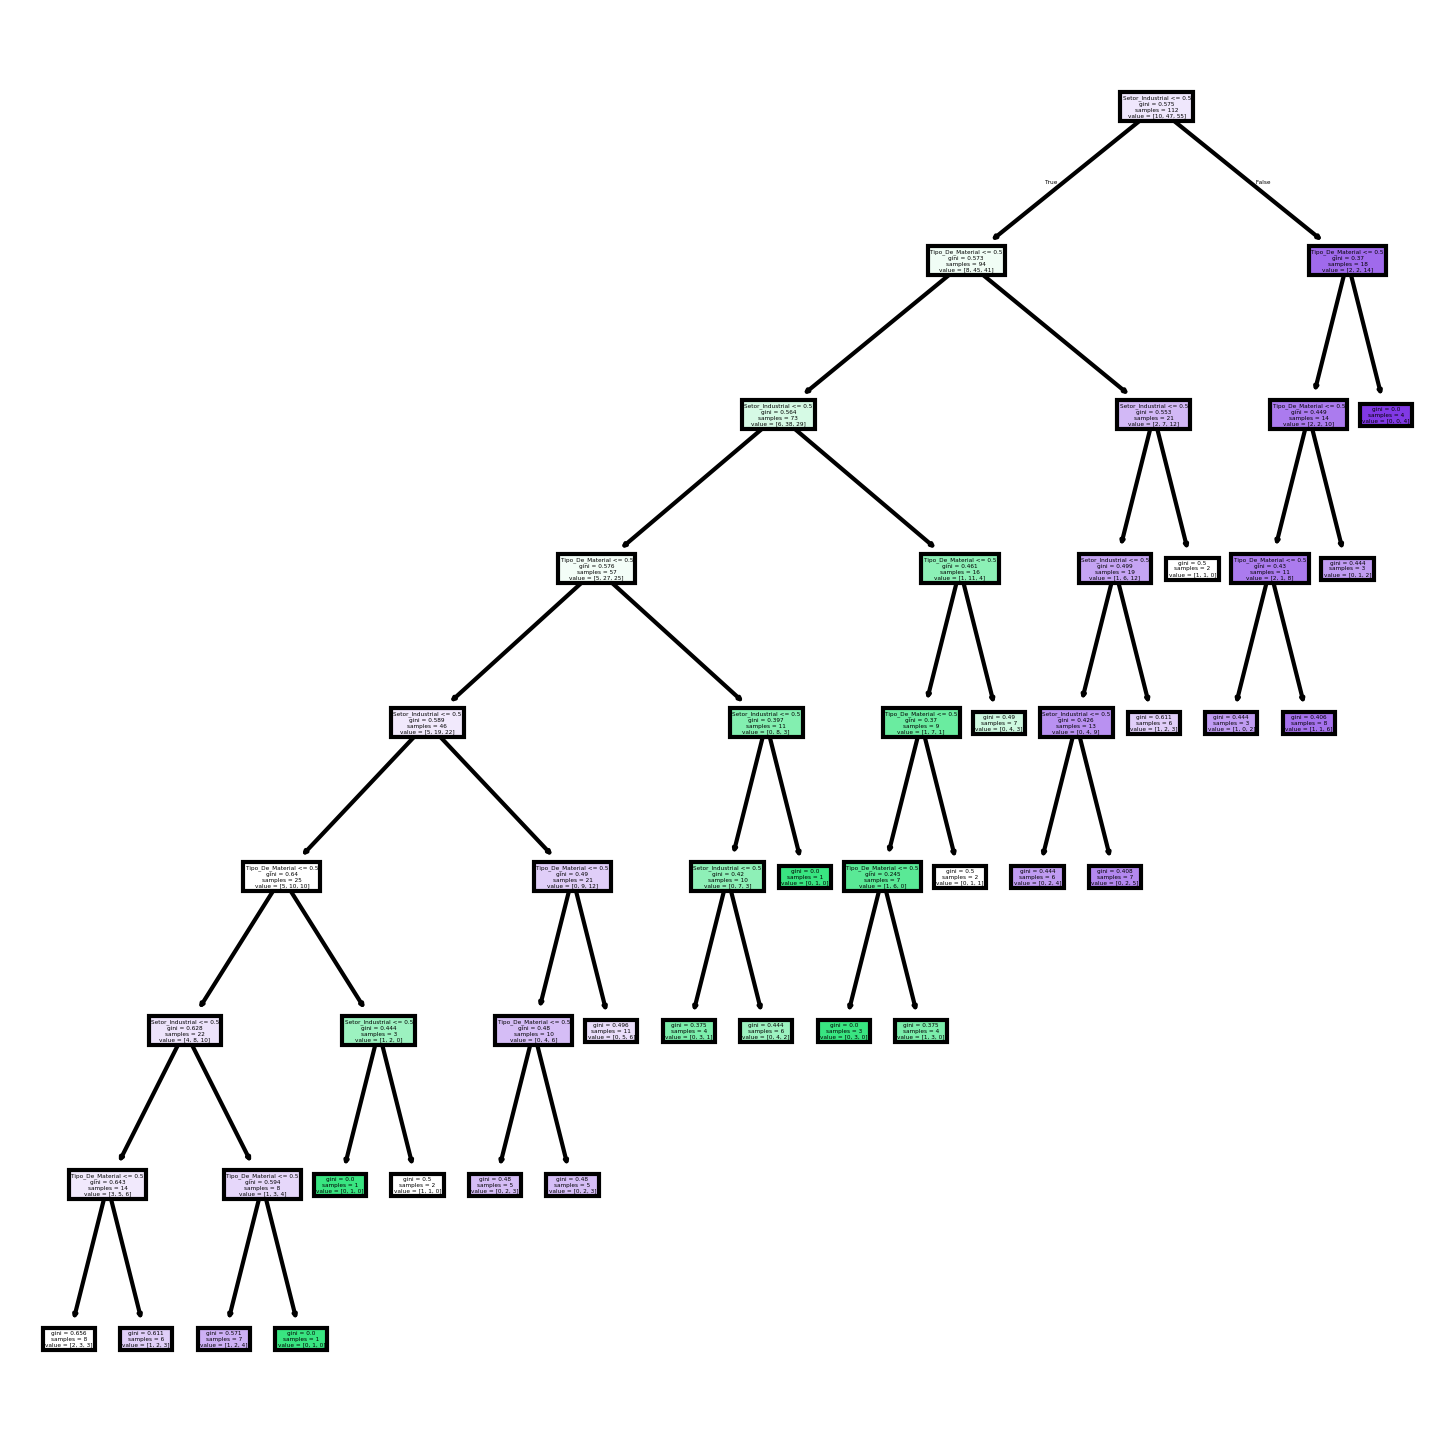

In [100]:
# Carregue sua base de dados
# dataset = pd.read_csv('seu_arquivo.csv') # Se necessário, adapte a leitura do arquivo

# Codificação das variáveis categóricas usando get_dummies
X_encoded = pd.get_dummies(dataset[['Tipo_De_Material', 'Setor_Industrial']])

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crie o classificador da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treine o classificador
clf.fit(X_train, y_train)

# Faça previsões
y_pred = clf.predict(X_test)

# Calcule a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da árvore de decisão: {accuracy:.2f}")

# Mapeamento dos nomes originais das colunas
original_feature_names = ['Tipo_De_Material', 'Setor_Industrial']

# Crie a lista de features mapeadas
fn_mapped = []
for col in X_encoded.columns:
    if 'Tipo_De_Material' in col:
        fn_mapped.append('Tipo_De_Material')
    elif 'Setor_Industrial' in col:
        fn_mapped.append('Setor_Industrial')

# Visualize a árvore de decisão
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6), dpi=300)

# Importante: não passe os nomes das classes diretamente, deixe o sklearn deduzir
tree.plot_tree(clf,
               feature_names=fn_mapped,  # Use a lista mapeada para os nomes originais
               filled=True)

# Salve a figura da árvore
fig.savefig('imagename.png')

# Mostre a árvore de decisão
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


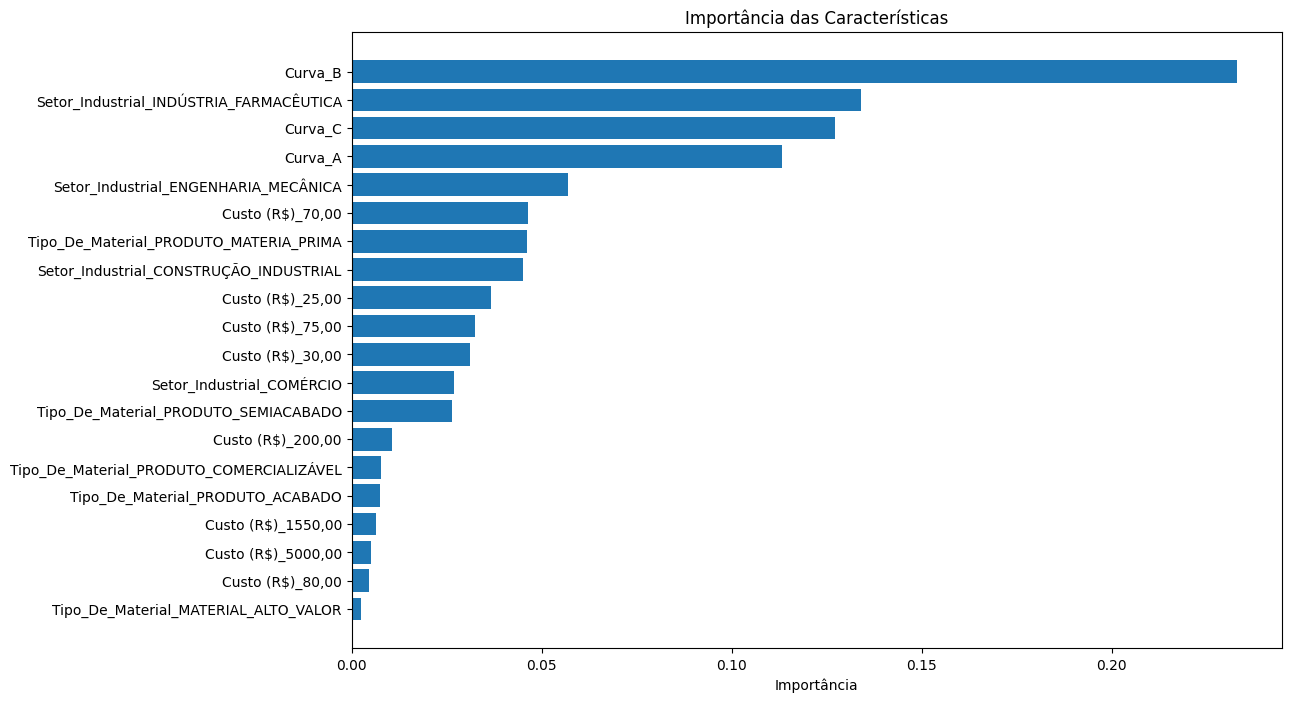

In [82]:
categorical_features = X.columns

# Transformador para codificar variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Criar o pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Dividir o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
pipeline.fit(X_train, y_train)
# Obter a importância das características
importances = pipeline.named_steps['classifier'].feature_importances_

# Obter as colunas codificadas
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
all_feature_names = np.array(categorical_feature_names)

# Ordenar por importância
sorted_idx = np.argsort(importances)

# Criar o gráfico
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), all_feature_names[sorted_idx])
plt.xlabel('Importância')
plt.title('Importância das Características')
plt.show()